# Data
- New York City and Jersey City Bike Share data from Kaggle (https://www.kaggle.com/datasets/akkithetechie/new-york-city-bike-share-dataset/)
- New York City weather data from (https://www.wunderground.com/history/daily/us/ny/new-york-city)

# Task
- Forecast the daily revenue for January, March, July, and October of 2016 (each month being roughly representative of a season)
- Complete the forecast for only 7 selected stations of choosing
- Assume the cost of bike rental is $1.00 + $0.10 per minute until the ride lasts

### Task breakdown
- **Step 1: Data Cleaning, Feature Engineering**
  - Clean the bike trip dataset, handling missing data, and dropping unnecessary columns
  - Create additional features like day of the week, hour of the day, public holidays, user age, revenue calculation
- **Step 2: Exploratory Data Analysis (EDA)**
  - Perform EDA to understand variable distributions, identify outliers, and visualize trends in trip durations
  - Explore the distribution of trip durations and assess their impact on revenue calculations
- **Step 3: Data Merging**
  - Develop a robust merging strategy, ensuring proper alignment of time periods and handling missing data appropriately
- **Step 4: Correlation Analysis**
  - Conduct a thorough correlation analysis within both weather and bike trip datasets, identifying features strongly correlated with revenue
- **Step 6: Visualizing Full Data**
  - Visualize the data
- **Step 5: Station-Specific Visualization**
  - Select 7 stations
  - Explore dynamic and scalable solutions for station-specific analysis, possibly through functions or loops
- **Step 8: Feature Selections**
  - Finding the most important features responsible for revenue
- **Step 9: FB Prophet Model**
  - Implement the FB Prophet model for forecasting daily revenue for January, March, July, and October 2016
  - Focus on the 7 selected stations
  - Assume a cost of bike rental as $1.00 + $0.10 per minute


### Importing necessary packages

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
#import warnings
#warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt


# Step 1: Data Cleaning, Feature Engineering

In [172]:
df1 = pd.read_csv('/content/NYC-BikeShare-2015-2017-combined.csv')

# First row of the data
df1.head(1)

,Unnamed: 0,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Trip_Duration_in_min
0,0,376,2015-10-01 00:16:26,2015-10-01 00:22:42,3212,Christ Hospital,40.734786,-74.050444,3207,Oakland Ave,40.737604,-74.052478,24470,Subscriber,1960.0,1,6


In [173]:
# List of columns to keep in df2
columns_to_keep = ['Trip Duration', 'Start Time', 'Stop Time', 'Start Station Name', 'End Station Name', 'Bike ID', 'User Type', 'Birth Year', 'Gender', 'Trip_Duration_in_min']

# Keep only the selected columns in df2
df1 = df1[columns_to_keep]

In [174]:
df2 = pd.read_csv('/content/new york city 2015-09-11 to 2017-03-31.csv')
df2.head(1)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,new york city,2015-09-11,80.5,66.5,72.9,81.0,66.5,73.0,61.6,69.4,0.13,100,16.67,rain,0.0,0.0,24.2,11.5,19.7,1007.5,70.5,9.4,178.5,15.4,7,NaN,2015-09-11T06:32:25,2015-09-11T19:12:17,0.94,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"72505394728,KEWR,KLGA,72502014734,KNYC,7250301..."


In [175]:
# List of columns to keep in df2
columns_to_keep = ['datetime', 'tempmax', 'tempmin', 'temp', 'feelslike', 'precip', 'precipprob', 'windgust', 'windspeed', 'winddir', 'humidity']

# Keep only the selected columns in df2
df2 = df2[columns_to_keep]

##### Checking the data type for each columns

In [176]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735502 entries, 0 to 735501
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Trip Duration         735502 non-null  int64  
 1   Start Time            735502 non-null  object 
 2   Stop Time             735502 non-null  object 
 3   Start Station Name    735502 non-null  object 
 4   End Station Name      735502 non-null  object 
 5   Bike ID               735502 non-null  int64  
 6   User Type             735502 non-null  object 
 7   Birth Year            735502 non-null  float64
 8   Gender                735502 non-null  int64  
 9   Trip_Duration_in_min  735502 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 56.1+ MB


In [177]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    568 non-null    object 
 1   tempmax     568 non-null    float64
 2   tempmin     568 non-null    float64
 3   temp        568 non-null    float64
 4   feelslike   568 non-null    float64
 5   precip      568 non-null    float64
 6   precipprob  568 non-null    int64  
 7   windgust    501 non-null    float64
 8   windspeed   568 non-null    float64
 9   winddir     568 non-null    float64
 10  humidity    568 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 48.9+ KB


#### - Checking for missing data

In [178]:
print(df1.isnull().sum())

Trip Duration           0
Start Time              0
Stop Time               0
Start Station Name      0
End Station Name        0
Bike ID                 0
User Type               0
Birth Year              0
Gender                  0
Trip_Duration_in_min    0
dtype: int64


In [179]:
print(df2.isnull().sum())

datetime       0
tempmax        0
tempmin        0
temp           0
feelslike      0
precip         0
precipprob     0
windgust      67
windspeed      0
winddir        0
humidity       0
dtype: int64


In [180]:
df2 = df2.drop(columns="windgust")

#### Adding additional features

In [181]:

df1['Start Time'] = pd.to_datetime(df1['Start Time'])
df1['Stop Time'] = pd.to_datetime(df1['Stop Time'])
df2['datetime'] = pd.to_datetime(df2['datetime'])

# Assuming 'Start Time' is a datetime column in your DataFrame
df1['Year'] = df1['Start Time'].dt.year
df1['Month'] = df1['Start Time'].dt.month



# Extract the date part from 'Start Time' column in df1
df1['date'] = df1['Start Time'].dt.date
# Convert the 'date' column to datetime type to match 'datetime'
df1['date'] = pd.to_datetime(df1['date'])
# Convert user age
df1['Birth Year'] = pd.to_numeric(df1['Birth Year'], errors='coerce')
df1['User Age'] = (df1['Year'] - df1['Birth Year']).astype(int)

# Create features for day of the week and hour of the day
df1['Day of Week'] = df1['Start Time'].dt.day_name()
df1['Weekend'] = df1['Day of Week'].apply(lambda day: 1 if day in ['Saturday', 'Sunday'] else 0)

# Create a new column for the hour of the day
df1['Hour of Day'] = df1['Start Time'].dt.hour




# List of public holidays in the United States covering 2015 to 2017
public_holidays_us = [
    '2016-01-01',  # New Year's Day
    '2016-07-04',  # Independence Day
    '2016-09-05',  # Labor Day
    '2016-11-24',  # Thanksgiving Day
    '2016-12-25',  # Christmas Day
    '2017-01-01',  # New Year's Day
    '2017-07-04',  # Independence Day
    '2017-09-04',  # Labor Day
    '2017-11-23',  # Thanksgiving Day
    '2017-12-25'   # Christmas Day
]

# Create a feature for public holidays
df1['Public Holiday'] = df1['Start Time'].dt.strftime('%Y-%m-%d').isin(public_holidays_us).astype(int)

# Calculating revenue
revenue =  df1.Trip_Duration_in_min.mul(.10)+1
df1["Revenue"] = revenue


# Exploratory Data Analysis (EDA)

####  Summary statistics for numerical columns

In [182]:
df1.describe().round(2)

,Trip Duration,Bike ID,Birth Year,Gender,Trip_Duration_in_min,Year,Month,User Age,Weekend,Hour of Day,Public Holiday,Revenue
count,735502.00,735502.00,735502.00,735502.00,735502.00,735502.00,735502.00,735502.00,735502.00,735502.00,735502.00,735502.00
mean,934.31,24914.01,1979.54,1.12,15.57,2015.95,7.26,36.41,0.22,13.60,0.01,2.56
std,40638.78,753.77,9.37,0.52,677.31,0.57,3.37,9.38,0.41,5.23,0.08,67.73
min,61.00,14552.00,1900.00,0.00,1.00,2015.00,1.00,16.00,0.00,0.00,0.00,1.10
25%,246.00,24486.00,1975.00,1.00,4.00,2016.00,4.00,30.00,0.00,9.00,0.00,1.40
50%,383.00,24602.00,1982.00,1.00,6.00,2016.00,8.00,34.00,0.00,14.00,0.00,1.60
75%,652.00,24711.00,1986.00,1.00,11.00,2016.00,10.00,41.00,0.00,18.00,0.00,2.10
max,20260211.00,29296.00,2000.00,2.00,337670.00,2017.00,12.00,116.00,1.00,23.00,1.00,33768.00


#### Visualizing the trip duration minutes

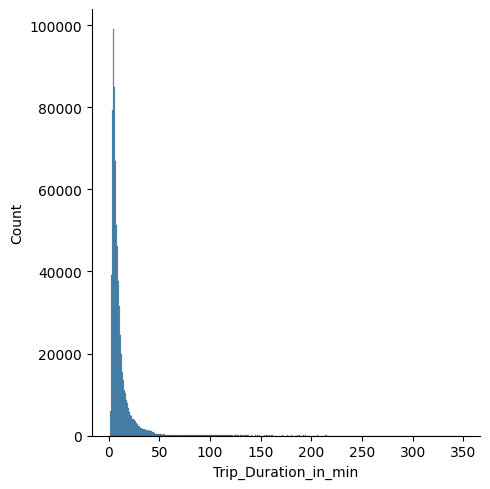

In [183]:
sns.displot(data=df1,x="Trip_Duration_in_min", bins=range(1,350))

the distribution is highly skewed, nned to remove outliers

In [184]:
# Calculate IQR
Q1 = df1['Trip_Duration_in_min'].quantile(0.25)
Q3 = df1['Trip_Duration_in_min'].quantile(0.75)
IQR = Q3 - Q1
print("Interquartile Range:", IQR)
sd = df1['Trip_Duration_in_min'].std()
print("Standard Deviation:", sd)
# Define a threshold for identifying outliers
outlier_threshold = 1.5

# Identify outliers
outliers = df1[(df1['Trip_Duration_in_min'] < (Q1 - outlier_threshold * IQR)) | (df1['Trip_Duration_in_min'] > (Q3 + outlier_threshold * IQR))]

# Display the outliers
print("Number of outliers:", len(outliers))

# Remove outliers from the original DataFrame
filtered_df = df1[~df1.index.isin(outliers.index)]

# Display the shape of the filtered DataFrame
print("Shape of filtered DataFrame:", filtered_df.shape)

Interquartile Range: 7.0
Standard Deviation: 677.3124372520454
Number of outliers: 63787
Shape of filtered DataFrame: (671715, 19)


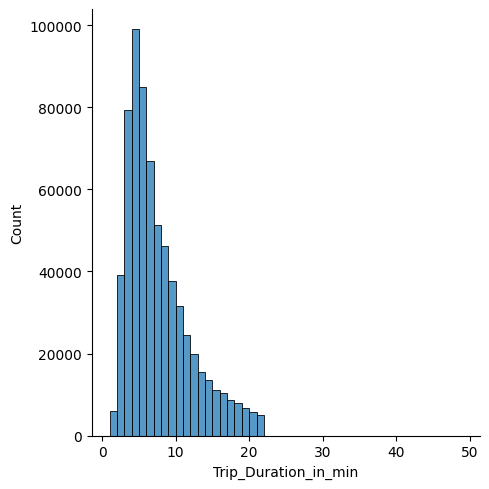

In [185]:
sns.displot(data=filtered_df,x="Trip_Duration_in_min", bins=range(1,50))

#### Visualizing user age

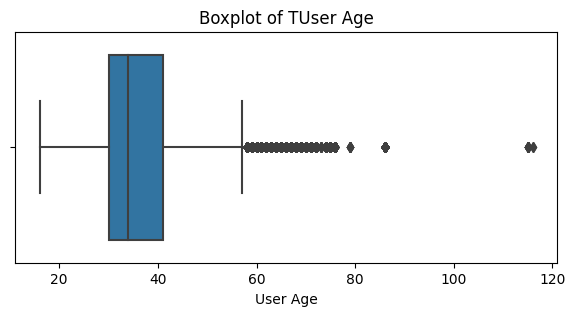

In [186]:
plt.figure(figsize=(7, 3))
sns.boxplot(x=filtered_df['User Age'])
plt.title('Boxplot of TUser Age')
plt.xlabel('User Age')
plt.show()

In [187]:
# Remove users with age greater than 60
df_filtered = filtered_df[filtered_df['User Age'] <= 60]


# Step 3: Data Merging

In [188]:
# Merge df1 and df2 based on the 'date' and 'datetime' columns
merged_df = pd.merge(df_filtered, df2, left_on='date', right_on='datetime', how='inner')

# Drop the additional 'date' column if not needed in the final result
merged_df = merged_df.drop('datetime', axis=1)


In [189]:
# Assuming 'your_dataframe' is your DataFrame
pd.set_option('display.max_columns', None)

merged_df.head()

,Trip Duration,Start Time,Stop Time,Start Station Name,End Station Name,Bike ID,User Type,Birth Year,Gender,Trip_Duration_in_min,Year,Month,date,User Age,Day of Week,Weekend,Hour of Day,Public Holiday,Revenue,tempmax,tempmin,temp,feelslike,precip,precipprob,windspeed,winddir,humidity
0,376,2015-10-01 00:16:26,2015-10-01 00:22:42,Christ Hospital,Oakland Ave,24470,Subscriber,1960.0,1,6,2015,10,2015-10-01,55,Thursday,0,0,0,1.6,63.9,55.7,58.6,58.6,0.087,100,15.8,30.3,70.5
1,739,2015-10-01 00:27:12,2015-10-01 00:39:32,Oakland Ave,Christ Hospital,24481,Subscriber,1960.0,1,12,2015,10,2015-10-01,55,Thursday,0,0,0,2.2,63.9,55.7,58.6,58.6,0.087,100,15.8,30.3,70.5
2,275,2015-10-01 00:34:31,2015-10-01 00:39:06,Newport Pkwy,Warren St,24613,Subscriber,1975.0,1,5,2015,10,2015-10-01,40,Thursday,0,0,0,1.5,63.9,55.7,58.6,58.6,0.087,100,15.8,30.3,70.5
3,561,2015-10-01 00:40:12,2015-10-01 00:49:33,Exchange Place,Liberty Light Rail,24668,Customer,1984.0,0,9,2015,10,2015-10-01,31,Thursday,0,0,0,1.9,63.9,55.7,58.6,58.6,0.087,100,15.8,30.3,70.5
4,365,2015-10-01 00:41:46,2015-10-01 00:47:51,Heights Elevator,Central Ave,24644,Customer,1984.0,0,6,2015,10,2015-10-01,31,Thursday,0,0,0,1.6,63.9,55.7,58.6,58.6,0.087,100,15.8,30.3,70.5


# Step 4: Correlation Analysis

#### - Creating a correlation matrix to see which if any column in the weather dataset has any impact on teh revenue or number of bike used per day

In [190]:
variables_of_interest = ['Trip_Duration_in_min', 'Day of Week','Hour of Day','Year','Month', 'Weekend',
                           'Public Holiday', 'User Age', 'tempmax', 'tempmin', 'temp', 'feelslike',
                           'precip', 'precipprob',  'windspeed', 'humidity', 'Revenue']


corr = merged_df[variables_of_interest].corr()


<ipython-input-190-37e2a8b4cefa>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_df[variables_of_interest].corr()


<Axes: >

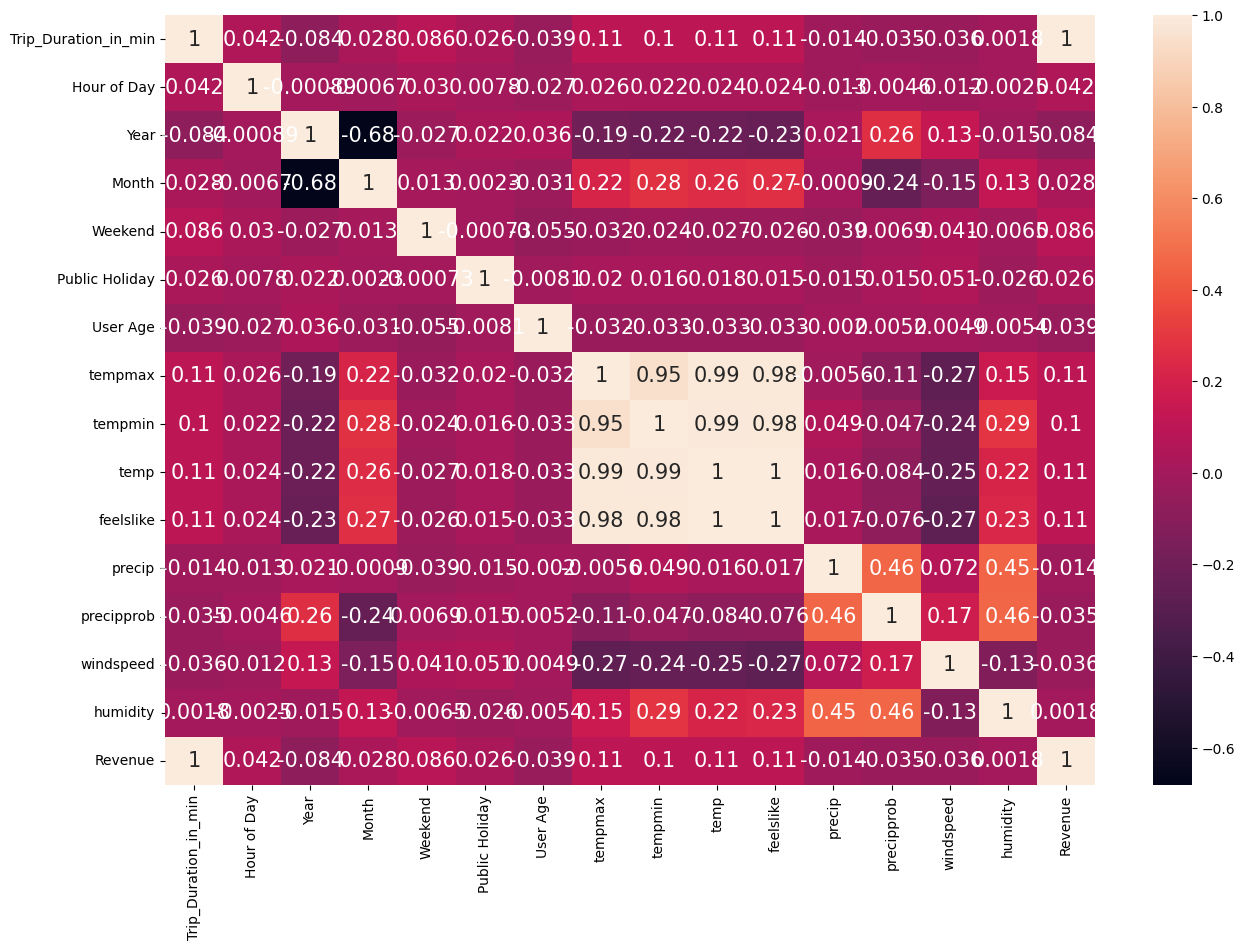

In [191]:
#corr = merged_datas_x.corr()
plt.figure(figsize= (15,10))
sns.heatmap(corr,annot = True, annot_kws= {'size':15})

# Step 5: Visualizing full data

### Daily trend for the entire data

<ipython-input-192-6461a6b45e37>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=merged_df['date'], y=merged_df['Revenue'], palette='viridis')


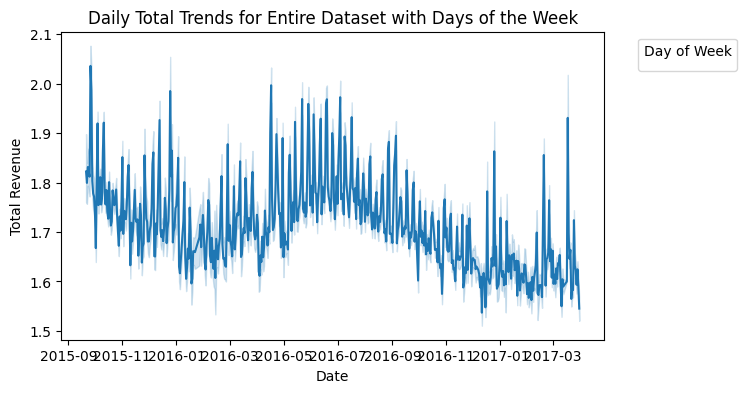

In [192]:
plt.figure(figsize=(7, 4))

# Plot daily total revenue with different colors for each day of the week
sns.lineplot(x=merged_df['date'], y=merged_df['Revenue'], palette='viridis')

plt.title('Daily Total Trends for Entire Dataset with Days of the Week')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Hourly trend for the entire data

<ipython-input-193-0fdc3fa2a0f7>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=merged_df['Hour of Day'], y=merged_df['Revenue'], estimator=sum, ci=None, palette='viridis')


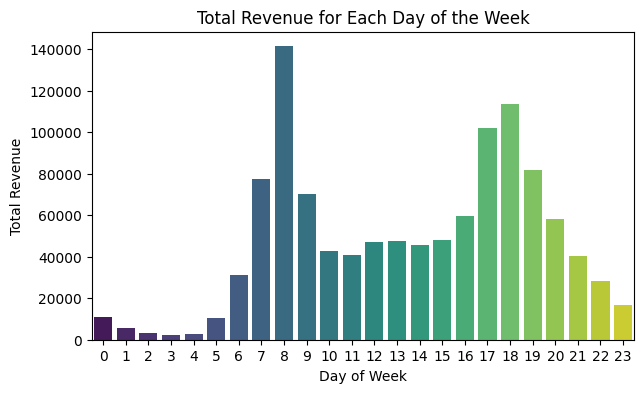

In [193]:
# Assuming merged_df contains the necessary columns, including 'date', 'Revenue', and 'Day of Week'

plt.figure(figsize=(7, 4))

# Plot total revenue for each day of the week
sns.barplot(x=merged_df['Hour of Day'], y=merged_df['Revenue'], estimator=sum, ci=None, palette='viridis')

plt.title('Total Revenue for Each Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue')
plt.show()


### Weekly trend for the entire data

<ipython-input-194-e4bb06c91b5d>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=merged_df['Day of Week'], y=merged_df['Revenue'], estimator=sum, ci=None, palette='viridis')


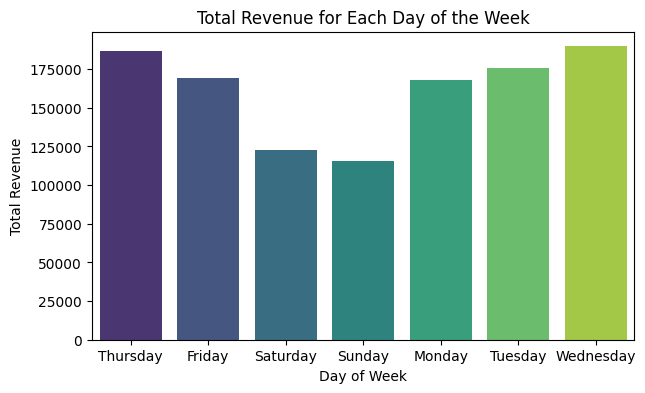

In [194]:
# Assuming merged_df contains the necessary columns, including 'date', 'Revenue', and 'Day of Week'

plt.figure(figsize=(7, 4))

# Plot total revenue for each day of the week
sns.barplot(x=merged_df['Day of Week'], y=merged_df['Revenue'], estimator=sum, ci=None, palette='viridis')

plt.title('Total Revenue for Each Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue')
plt.show()


### Monthly trend for the entire data

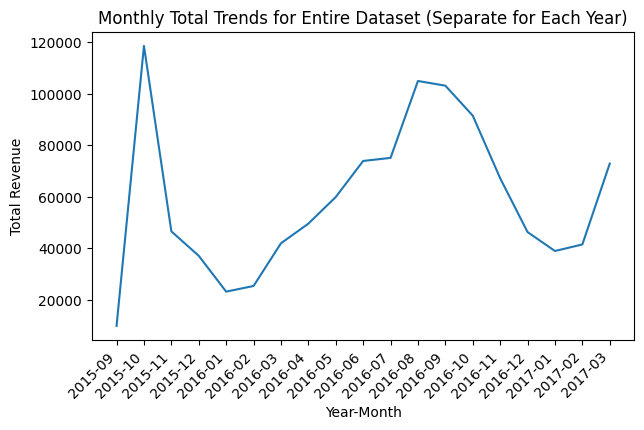

In [195]:

# Extract year-month from Start Time
merged_df['YearMonth'] = merged_df['date'].dt.to_period('M')

plt.figure(figsize=(7, 4))
monthly_totals = merged_df.groupby('YearMonth')['Revenue'].sum()
sns.lineplot(x=monthly_totals.index.astype(str), y=monthly_totals)
plt.title('Monthly Total Trends for Entire Dataset (Separate for Each Year)')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()




# Station specific visualizations


In [196]:
### Following are all the different types of stations in the  in the bike trip dataset,
unique_start_stations = df1['Start Station Name'].unique()
print(unique_start_stations)

['Christ Hospital' 'Oakland Ave' 'Lincoln Park' 'Newport Pkwy'
 'Exchange Place' 'Heights Elevator' 'Hilltop' 'North St' 'Van Vorst Park'
 'McGinley Square' 'Central Ave' 'Riverview Park' 'Brunswick St'
 'Essex Light Rail' 'Pershing Field' 'Bayside Park' 'City Hall'
 'Grove St PATH' 'Warren St' 'Hamilton Park' 'Newark Ave'
 'JC Medical Center' 'Baldwin at Montgomery' 'Paulus Hook' 'Newport PATH'
 'Columbia Park' 'Dey St' '5 Corners Library' 'Sip Ave'
 'Garfield Ave Station' 'NJCU' 'Liberty Light Rail' 'MLK Light Rail'
 'Union St' 'West Side Light Rail' 'Jersey & 6th St' 'Morris Canal'
 'Jersey & 3rd' 'Lafayette Park' 'Monmouth and 6th' 'Dixon Mills'
 'Marin Light Rail' 'Manila & 1st' 'Columbus Drive' 'Bethune Center'
 'Leonard Gordon Park' 'Danforth Light Rail' 'Brunswick & 6th'
 'Astor Place' 'JCBS Depot' 'Communipaw & Berry Lane']


#### Here's 7 stations I  chose for forecast:

Grove St PATH: Located in a busy area with commercial and destinations

Exchange Place: Situated in a busy financial district, Close to offices, the waterfront, and transportation hubs.

Hamilton Park: A park area, surrounded by residential areas, schools, and local businesses.

Jersey & 6th St:  In a residential and commercial area, likely experiencing usage from locals.

Paulus Hook: In a historic district with residential space, local businesses, historic sites, and waterfront access.

Newark Ave: Located in a bustling area with shops, restaurants, and businesses.

Van Vorst Park: In a residential area with a park, Surrounded by residential buildings, schools, and local businesses.

In [197]:
stations_of_interest = ['Grove St PATH', 'Exchange Place', 'Hamilton Park', 'Jersey & 6th St', 'Paulus Hook', 'Newark Ave', 'Van Vorst Park']

new_df = merged_df[merged_df['Start Station Name'].str.contains('|'.join(stations_of_interest))]



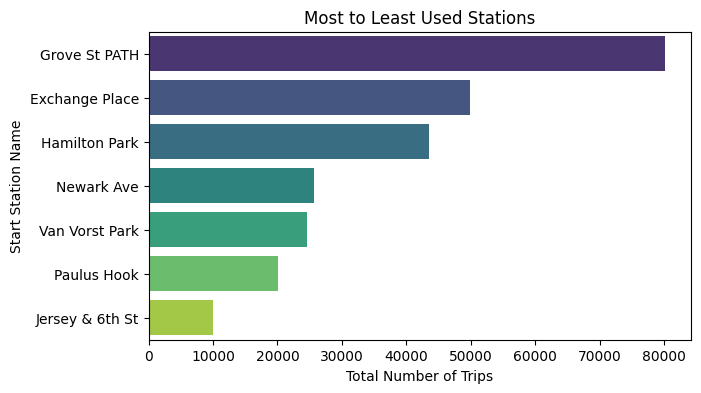

In [198]:

# Calculate the total number of trips for each station
station_usage = new_df['Start Station Name'].value_counts()

# Sort stations by usage in descending order
station_usage = station_usage.sort_values(ascending=False)

# Plot the bar graph
plt.figure(figsize=(7, 4))
sns.barplot(x=station_usage.values, y=station_usage.index, palette='viridis')
plt.title('Most to Least Used Stations')
plt.xlabel('Total Number of Trips')
plt.ylabel('Start Station Name')
plt.show()

In [199]:
merged_df.head(1)

,Trip Duration,Start Time,Stop Time,Start Station Name,End Station Name,Bike ID,User Type,Birth Year,Gender,Trip_Duration_in_min,Year,Month,date,User Age,Day of Week,Weekend,Hour of Day,Public Holiday,Revenue,tempmax,tempmin,temp,feelslike,precip,precipprob,windspeed,winddir,humidity,YearMonth
0,376,2015-10-01 00:16:26,2015-10-01 00:22:42,Christ Hospital,Oakland Ave,24470,Subscriber,1960.0,1,6,2015,10,2015-10-01,55,Thursday,0,0,0,1.6,63.9,55.7,58.6,58.6,0.087,100,15.8,30.3,70.5,2015-10


#### - Creating new dataframes for each station

In [200]:
# Create a dictionary to store station-specific DataFrames
station_dataframes = {}
station_names = ['Grove St PATH', 'Exchange Place', 'Hamilton Park', 'Jersey & 6th St', 'Paulus Hook', 'Newark Ave', 'Van Vorst Park']


# Iterate over station names to create DataFrames and store them in the dictionary
for station_name in station_names:
    station_data = new_df[(new_df['Start Station Name'] == station_name) | (new_df['End Station Name'] == station_name)]
    station_dataframes[f'{station_name}_d'] = station_data


### Daily trends for each station

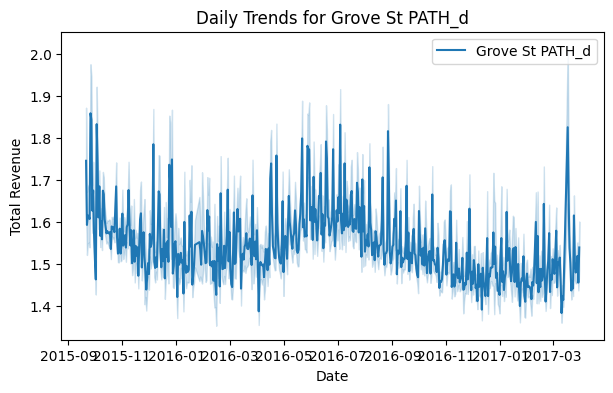

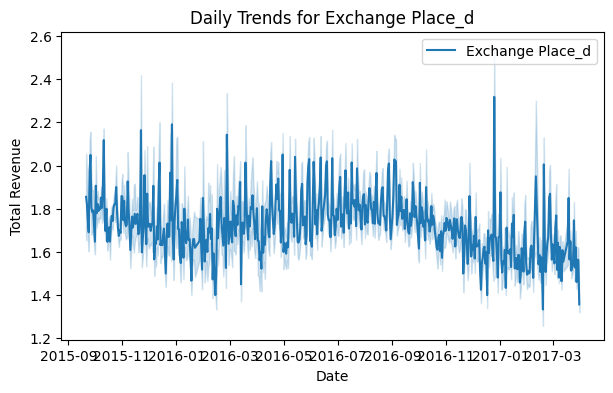

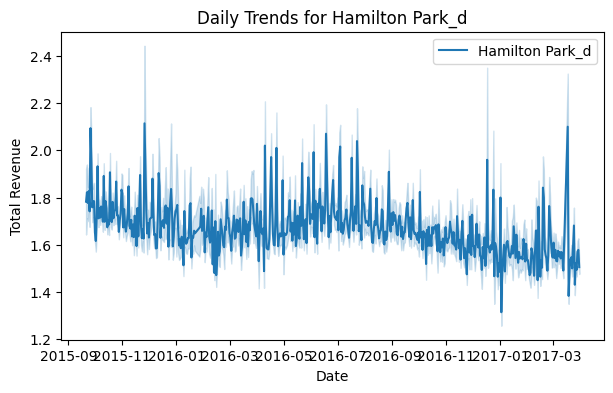

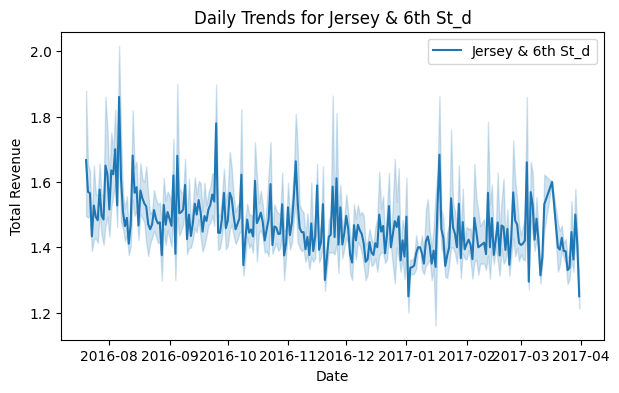

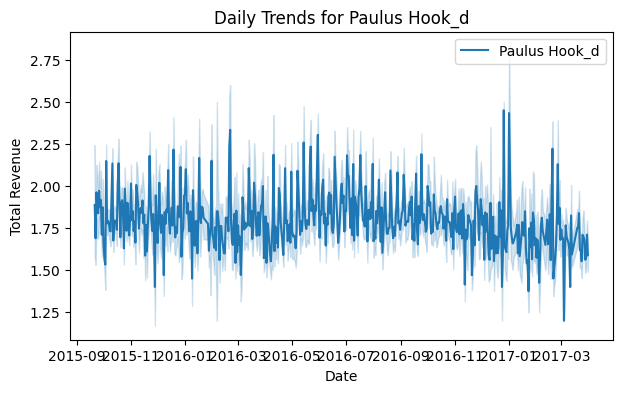

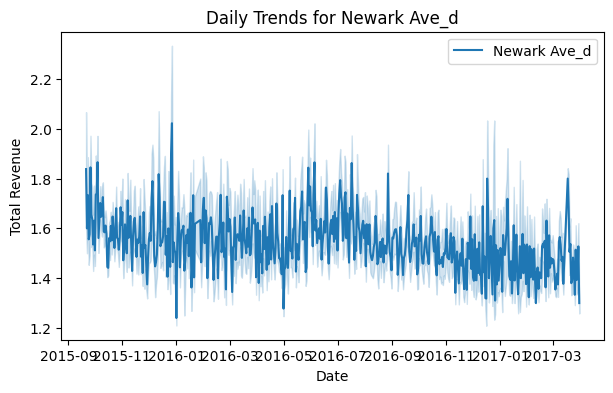

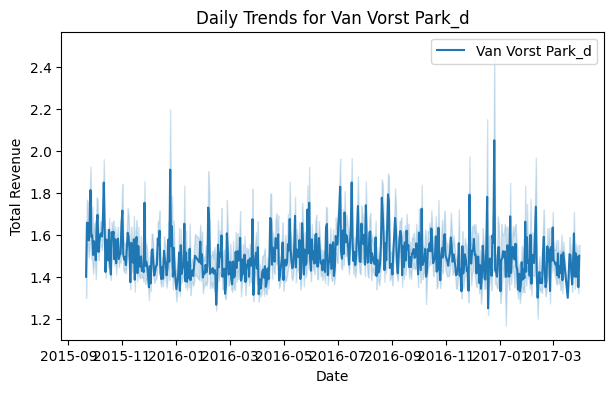

In [201]:
# Iterate over station names to create DataFrames and store them in the dictionary
for station_name, station_data in station_dataframes.items():
    plt.figure(figsize=(7, 4))

    # Plot total revenue for each day for the current station
    sns.lineplot(x=station_data['date'], y='Revenue', data=station_data, label=station_name)

    plt.title(f'Daily Trends for {station_name}')
    plt.xlabel('Date')
    plt.ylabel('Total Revenue')
    plt.legend()
    plt.show()

## Hourly trend for each station

In [202]:
station_data.head(2)

,Trip Duration,Start Time,Stop Time,Start Station Name,End Station Name,Bike ID,User Type,Birth Year,Gender,Trip_Duration_in_min,Year,Month,date,User Age,Day of Week,Weekend,Hour of Day,Public Holiday,Revenue,tempmax,tempmin,temp,feelslike,precip,precipprob,windspeed,winddir,humidity,YearMonth
6,647,2015-10-01 02:01:36,2015-10-01 02:12:24,Van Vorst Park,Garfield Ave Station,24650,Subscriber,1988.0,1,11,2015,10,2015-10-01,27,Thursday,0,2,0,2.1,63.9,55.7,58.6,58.6,0.087,100,15.8,30.3,70.5,2015-10
20,213,2015-10-01 06:59:27,2015-10-01 07:03:01,Grove St PATH,Van Vorst Park,19086,Subscriber,1970.0,2,4,2015,10,2015-10-01,45,Thursday,0,6,0,1.4,63.9,55.7,58.6,58.6,0.087,100,15.8,30.3,70.5,2015-10


<ipython-input-203-a13f4c9e0b81>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=station_data["Hour of Day"], y='Revenue', data=station_data, estimator=sum, ci=None, palette='viridis')


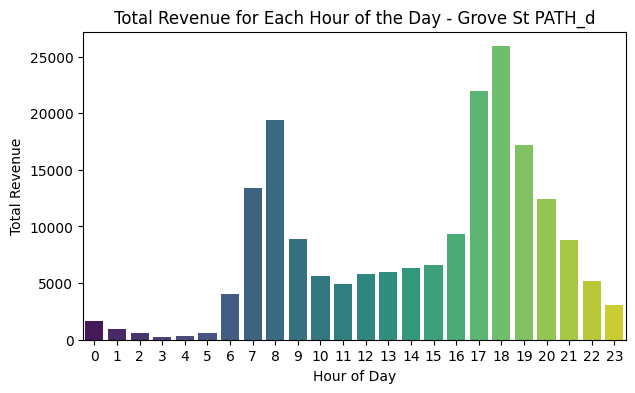

<ipython-input-203-a13f4c9e0b81>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=station_data["Hour of Day"], y='Revenue', data=station_data, estimator=sum, ci=None, palette='viridis')


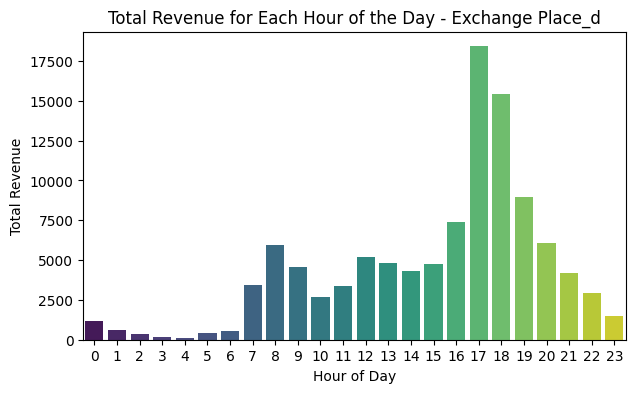

<ipython-input-203-a13f4c9e0b81>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=station_data["Hour of Day"], y='Revenue', data=station_data, estimator=sum, ci=None, palette='viridis')


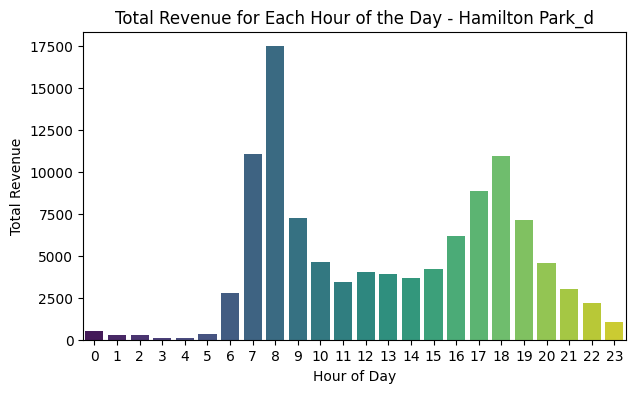

<ipython-input-203-a13f4c9e0b81>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=station_data["Hour of Day"], y='Revenue', data=station_data, estimator=sum, ci=None, palette='viridis')


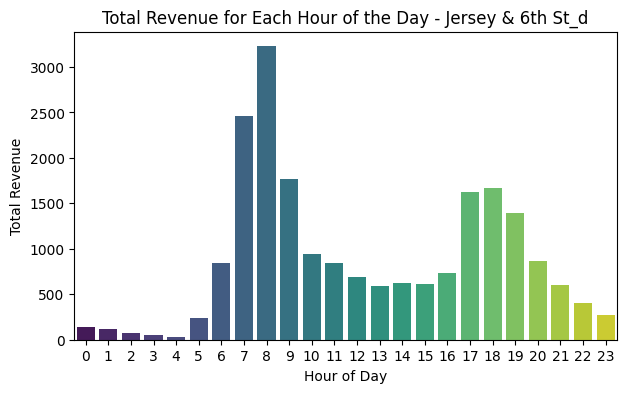

<ipython-input-203-a13f4c9e0b81>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=station_data["Hour of Day"], y='Revenue', data=station_data, estimator=sum, ci=None, palette='viridis')


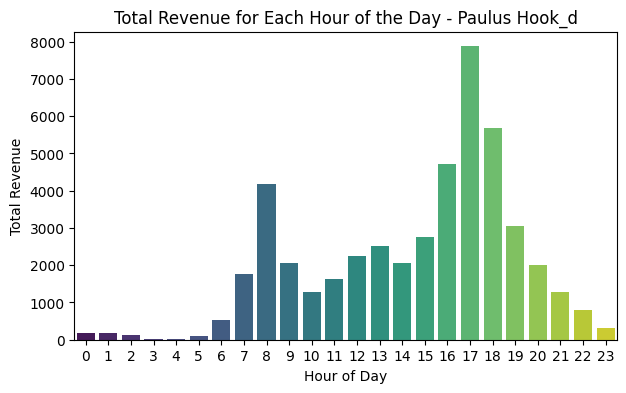

<ipython-input-203-a13f4c9e0b81>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=station_data["Hour of Day"], y='Revenue', data=station_data, estimator=sum, ci=None, palette='viridis')


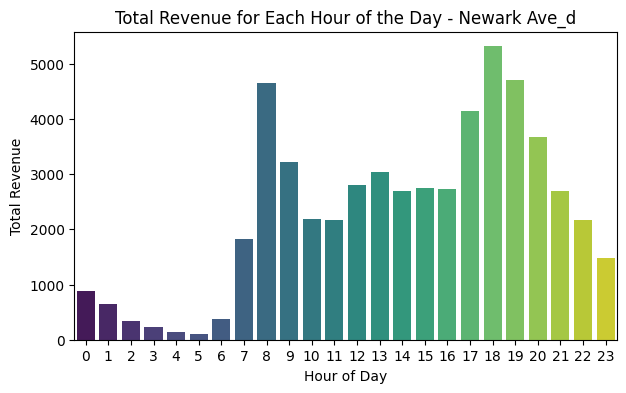

<ipython-input-203-a13f4c9e0b81>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=station_data["Hour of Day"], y='Revenue', data=station_data, estimator=sum, ci=None, palette='viridis')


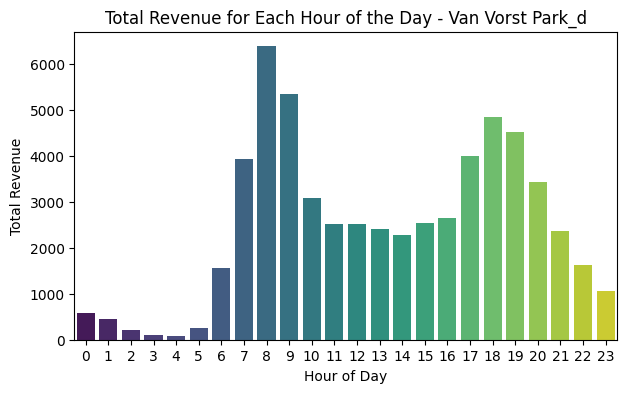

In [203]:
# Iterate over station names to create DataFrames and store them in the dictionary
for station_name, station_data in station_dataframes.items():
    plt.figure(figsize=(7, 4))

    # Plot total revenue for each hour of the day for the current station
    sns.barplot(x=station_data["Hour of Day"], y='Revenue', data=station_data, estimator=sum, ci=None, palette='viridis')

    plt.title(f'Total Revenue for Each Hour of the Day - {station_name}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Total Revenue')
    plt.show()

## Weekly trend for each stations

<ipython-input-204-0aaa1a3c188d>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=station_data["Day of Week"], y='Revenue', data=station_data, estimator=sum, ci=None, palette='viridis', order=days_order)


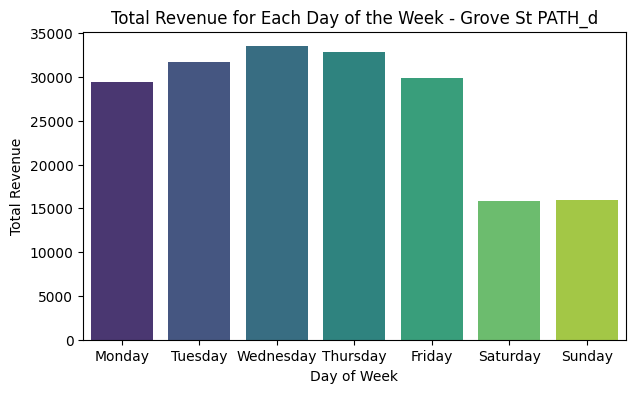

<ipython-input-204-0aaa1a3c188d>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=station_data["Day of Week"], y='Revenue', data=station_data, estimator=sum, ci=None, palette='viridis', order=days_order)


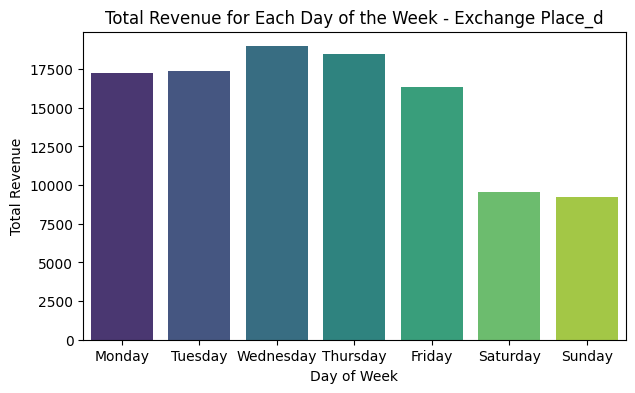

<ipython-input-204-0aaa1a3c188d>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=station_data["Day of Week"], y='Revenue', data=station_data, estimator=sum, ci=None, palette='viridis', order=days_order)


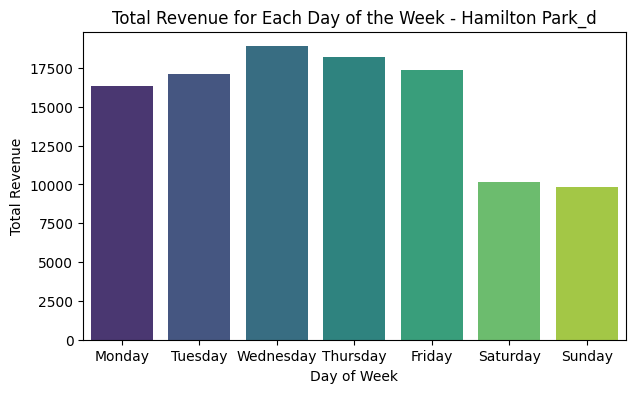

<ipython-input-204-0aaa1a3c188d>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=station_data["Day of Week"], y='Revenue', data=station_data, estimator=sum, ci=None, palette='viridis', order=days_order)


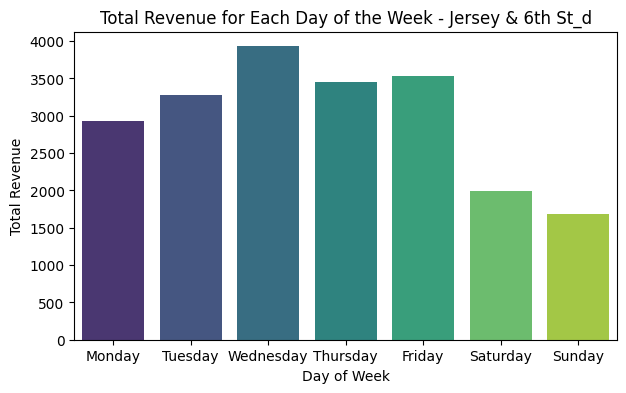

<ipython-input-204-0aaa1a3c188d>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=station_data["Day of Week"], y='Revenue', data=station_data, estimator=sum, ci=None, palette='viridis', order=days_order)


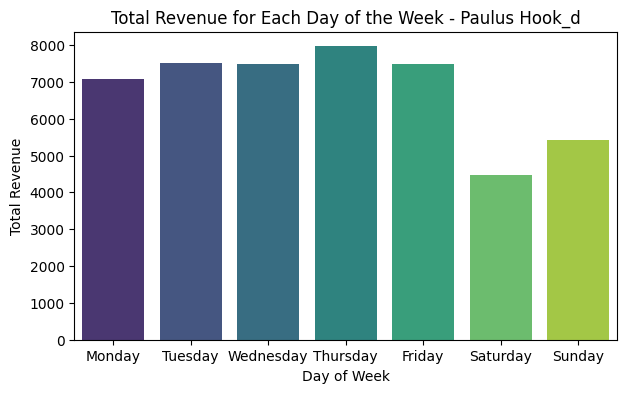

<ipython-input-204-0aaa1a3c188d>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=station_data["Day of Week"], y='Revenue', data=station_data, estimator=sum, ci=None, palette='viridis', order=days_order)


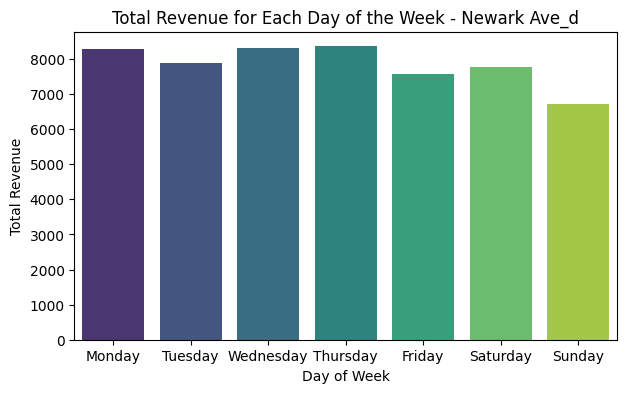

<ipython-input-204-0aaa1a3c188d>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=station_data["Day of Week"], y='Revenue', data=station_data, estimator=sum, ci=None, palette='viridis', order=days_order)


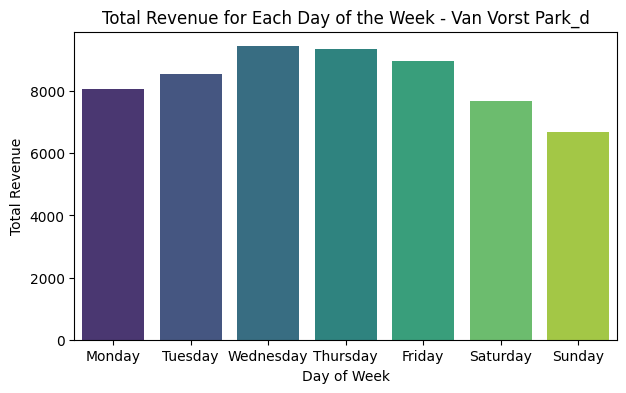

In [204]:
# Define the order of days of the week
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Iterate over station names to create DataFrames and store them in the dictionary
for station_name, station_data in station_dataframes.items():
    plt.figure(figsize=(7, 4))

    # Plot total revenue for each day of the week for the current station
    sns.barplot(x=station_data["Day of Week"], y='Revenue', data=station_data, estimator=sum, ci=None, palette='viridis', order=days_order)

    plt.title(f'Total Revenue for Each Day of the Week - {station_name}')
    plt.xlabel('Day of Week')
    plt.ylabel('Total Revenue')
    plt.show()

## Monthly trends for each station

<ipython-input-205-d53d87f1d442>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  station_monthly = station_data.groupby([station_data['date'].dt.year, station_data['date'].dt.month]).sum()  # Aggregate by year-month
<ipython-input-205-d53d87f1d442>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  station_monthly = station_data.groupby([station_data['date'].dt.year, station_data['date'].dt.month]).sum()  # Aggregate by year-month
<ipython-input-205-d53d87f1d442>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. E

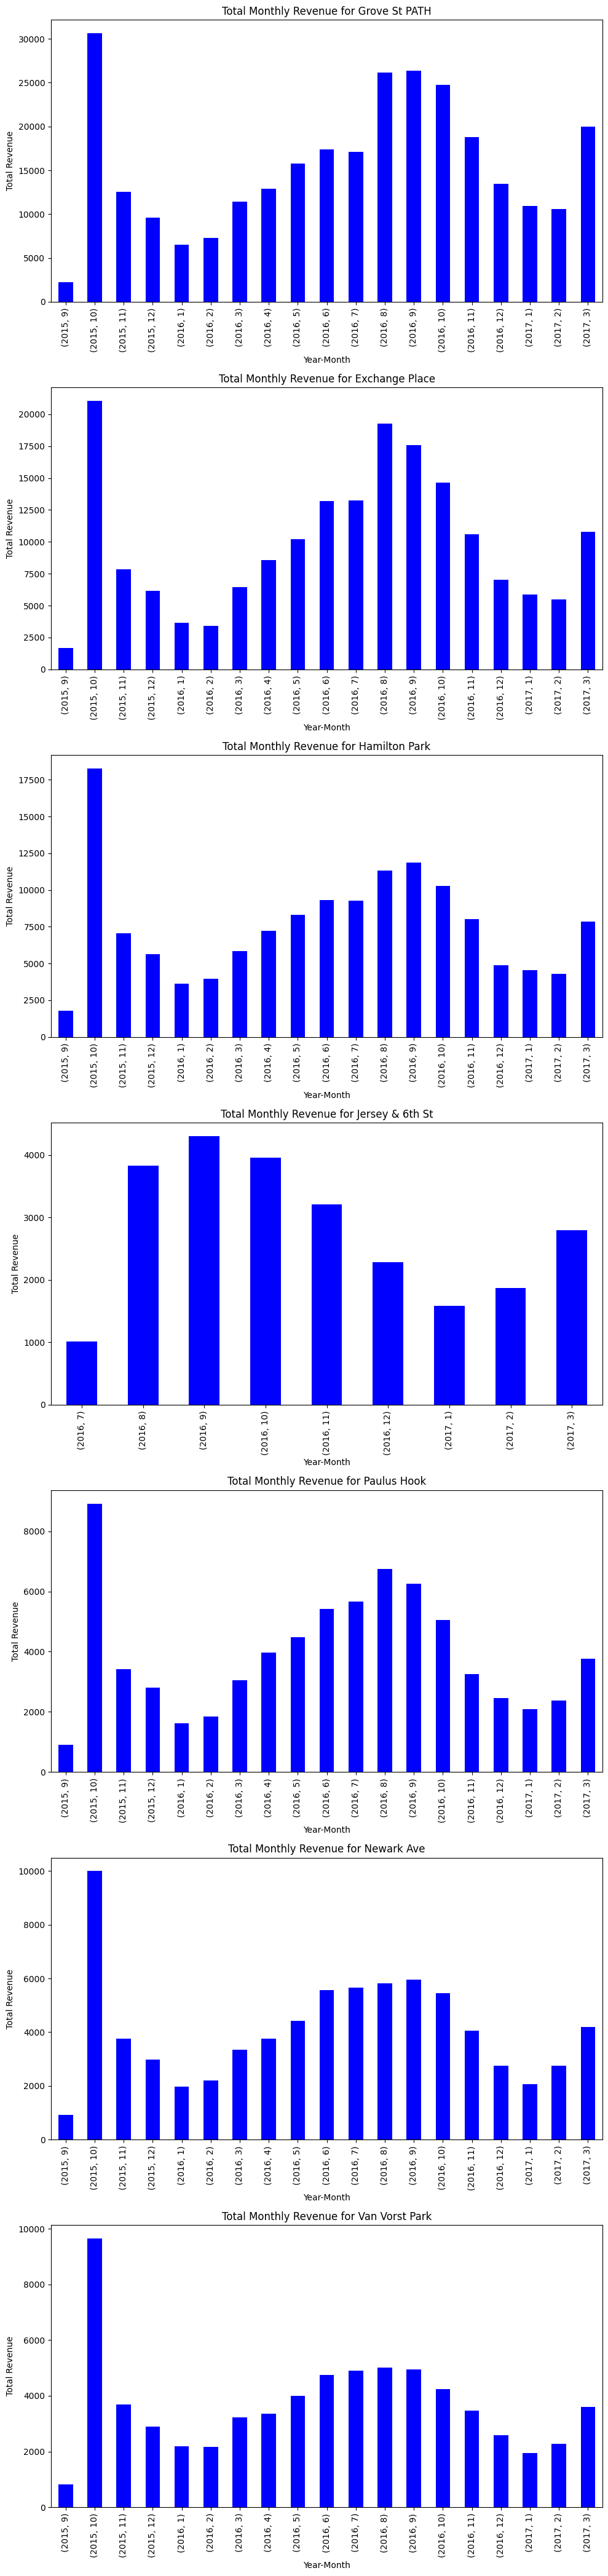

In [205]:
# Create a dictionary to store station-specific DataFrames
station_dataframes = {}
station_names = ['Grove St PATH', 'Exchange Place', 'Hamilton Park', 'Jersey & 6th St', 'Paulus Hook', 'Newark Ave', 'Van Vorst Park']

# Iterate over station names to create DataFrames and store them in the dictionary
for station_name in station_names:
    station_data = merged_df[(merged_df['Start Station Name'] == station_name) | (merged_df['End Station Name'] == station_name)]
    station_monthly = station_data.groupby([station_data['date'].dt.year, station_data['date'].dt.month]).sum()  # Aggregate by year-month
    station_dataframes[f'{station_name}_m'] = station_monthly

# Plot total monthly revenue for each station in separate subplots
fig, axes = plt.subplots(nrows=len(station_names), figsize=(10, 6 * len(station_names)))

for i, station_name in enumerate(station_names):
    station_df_key = f'{station_name}_m'
    station_df = station_dataframes[station_df_key]

    ax = axes[i] if len(station_names) > 1 else axes  # Use a single subplot if there's only one station

    station_df['Revenue'].plot(kind='bar', color='blue', ax=ax)

    ax.set_title(f'Total Monthly Revenue for {station_name}')
    ax.set_xlabel('Year-Month')
    ax.set_ylabel('Total Revenue')
    ax.legend().set_visible(False)  # Hide legend to avoid overlap

plt.tight_layout()
plt.show()


In [206]:
merged_df.head(2)

,Trip Duration,Start Time,Stop Time,Start Station Name,End Station Name,Bike ID,User Type,Birth Year,Gender,Trip_Duration_in_min,Year,Month,date,User Age,Day of Week,Weekend,Hour of Day,Public Holiday,Revenue,tempmax,tempmin,temp,feelslike,precip,precipprob,windspeed,winddir,humidity,YearMonth
0,376,2015-10-01 00:16:26,2015-10-01 00:22:42,Christ Hospital,Oakland Ave,24470,Subscriber,1960.0,1,6,2015,10,2015-10-01,55,Thursday,0,0,0,1.6,63.9,55.7,58.6,58.6,0.087,100,15.8,30.3,70.5,2015-10
1,739,2015-10-01 00:27:12,2015-10-01 00:39:32,Oakland Ave,Christ Hospital,24481,Subscriber,1960.0,1,12,2015,10,2015-10-01,55,Thursday,0,0,0,2.2,63.9,55.7,58.6,58.6,0.087,100,15.8,30.3,70.5,2015-10


In [207]:
# One-hot encode 'Day of Week'
#merged_df = pd.get_dummies(merged_df, columns=['Day of Week'], prefix='Day_of_Week', drop_first=True)

# One-hot encode 'User Type'
#merged_df = pd.get_dummies(merged_df, columns=['User Type'], prefix='User_Type', drop_first=True)


# Feature selections

In [208]:
from sklearn.ensemble import RandomForestRegressor

# Assuming 'merged_df' contains the necessary columns, including 'Revenue'
# List of columns to drop
columns_to_drop = ['Start Time', 'Stop Time','Start Station Name', 'End Station Name', 'Bike ID','Birth Year', 'YearMonth', 'Trip Duration','Trip_Duration_in_min' ]

# Drop the specified columns
features_selection_df = merged_df.drop(columns=columns_to_drop)


In [209]:
features_selection_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 658132 entries, 0 to 658131
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   User Type       658132 non-null  object        
 1   Gender          658132 non-null  int64         
 2   Year            658132 non-null  int64         
 3   Month           658132 non-null  int64         
 4   date            658132 non-null  datetime64[ns]
 5   User Age        658132 non-null  int64         
 6   Day of Week     658132 non-null  object        
 7   Weekend         658132 non-null  int64         
 8   Hour of Day     658132 non-null  int64         
 9   Public Holiday  658132 non-null  int64         
 10  Revenue         658132 non-null  float64       
 11  tempmax         658132 non-null  float64       
 12  tempmin         658132 non-null  float64       
 13  temp            658132 non-null  float64       
 14  feelslike       658132 non-null  flo

In [210]:
# One-hot encode 'Day of Week'
features_selection_df = pd.get_dummies(features_selection_df, columns=['Day of Week'], prefix='Day_of_Week', drop_first=True)

# One-hot encode 'User Type'
features_selection_df = pd.get_dummies(features_selection_df, columns=['User Type'], prefix='User_Type', drop_first=True)


In [ ]:
# Convert 'date' column to string
features_selection_df['date'] = features_selection_df['date'].astype(str)

# Extract features and target variable
X = features_selection_df.drop(['Revenue', 'date'], axis=1)  # Exclude 'date' as it's not a numeric feature
y = features_selection_df['Revenue']

# Define the model
model = RandomForestRegressor()

# Fit the model
model.fit(X, y)

# Feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(7, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances for Revenue Prediction')
plt.show()

In [ ]:
feature_importance_df

# Step 6: Forecasting
### Building models on all stastion but station 'Jersey & 6th St_m'


In [ ]:
merged_df.head(2)


In [ ]:
import pandas as pd


# One-hot encode 'User Type'
#merged_df = pd.get_dummies(merged_df, columns=['User Type'], prefix='User_Type', drop_first=True)
# Assuming merged_df is your DataFrame
# List of columns to keep unchanged
columns_to_keep = [ 'Day of Week', 'Weekend', 'Public Holiday', 'Year', 'Month', 'temp', 'windspeed', 'humidity', 'temp', 'precip']
non_numerical_cols = ['Day of Week']

# Group by 'date' and aggregate the columns using mean for numerical columns and first for non-numerical columns
agg_data = merged_df.groupby('date').agg({
    **{col: 'mean' for col in columns_to_keep if col not in non_numerical_cols},
    **{col: 'first' for col in non_numerical_cols},
    'Revenue': 'sum'
}).reset_index()

In [ ]:
agg_data

In [ ]:
#prophet_df = merged_df[['date', 'Revenue', 'User Type', 'Gender','User Age', 'Day of Week',  'Hour of Day','Weekend', 'Public Holiday', 'Year', 'Month', 'temp',  'windspeed', 'humidity', 'temp',  'precip']].rename(columns={'date': 'ds', 'Revenue': 'y'})

from prophet import Prophet


In [ ]:
prophet_df = agg_data.rename(columns={'date': 'ds', 'Revenue': 'y'})
# Extract the last 30 days for testing
test_data = prophet_df.tail(30)

# Use the remaining data for training
train_data = prophet_df.iloc[:-30]


# Create and fit the Prophet model
model = Prophet()
model.fit(train_data)



In [ ]:
test_data.head(2)

In [ ]:
# Create a DataFrame with future dates for forecasting
future = model.make_future_dataframe(periods=30)  # Forecasting for the next 30 days

# Forecast on the test data
forecast = model.predict(future)

# Plot the forecast vs actual for the last 30 days
plt.figure(figsize=(10, 6))
plt.plot(prophet_df['ds'], prophet_df['y'], label='Actual', color='blue')
plt.plot(forecast['ds'][-30:], forecast['yhat'][-30:], label='Forecast', color='orange')

plt.title('Prophet Model Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()


In [ ]:
 model.plot(forecast)

